<a href="https://colab.research.google.com/github/ssssihoon/WE_IT/blob/main/Data_analysis/15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝을 이용한 예측 분석

머신러닝 모델 만들기 = 함수 만들기

예측 변수와 타겟 변수

- 예측변수 : 예측하는 데 활용하는 변수 or 모델에 입력하는 값

- 타겟 변수 : 예측하고자 하는 변수 or 모델이 출력하는 값


ex : 예측 변수 - 흡연여부, 음주여부, 성별, 나이

 타겟 변수 - 당뇨병 발병 여부

의사결정나무 모델 :

예측값을 무엇으로 할지 의사결정을 해준다.

모든 예측 변수를 Yes/or로 답을 할 수 있는 질문으로 만들어 결과를 도출해낸다.

1. 타겟 변수를 가장 잘 분리하는 예측 변수 선택하기

2. 첫 번째 질문의 답변에 따라 데이터를 두 노드로 분할하기 (질문의 답변으로 분류된 집단을 노드라고 한다.)

3. 각 노드에서 타겟 변수를 가장 잘 분리하는 예측 변수 선택하기

4. 노드가 완벽하게 분리될 때까지 반복하기

## 소득 예측 모델 만들기

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WE_IT_DATA_ANALYSIS/adult.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


나이, 근로형태, 인구 통계 가중치, 최종학력, 교육기간, 결혼 상태, 직종, 가구주와의 관계, 인종, 성별, 자본 소득, 자본 손실, 주당 근무 시간, 출신국가, 연소득

전처리

In [3]:
df['income'].value_counts(normalize = True)
# 연소득 50000달러 이하 -> 76%, ''

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

In [4]:
import numpy as np
df['income'] = np.where(df['income'] == '>50K', 'high', 'low')
df['income'].value_counts(normalize = True)

low     0.760718
high    0.239282
Name: income, dtype: float64

In [5]:
# 쓰이지 않는 변수 drop
df = df.drop(columns = 'fnlwgt') # 가중치 드롭

In [6]:
# 문자 타입 변수를 숫자 타입으로 바꾸기
df_tmp = df[['sex']]
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [7]:
# df_tmp의 문자 타입 변수에 원핫 인코딩 적용
# 원핫 인코딩 : 값을 1과 0으로 바꾸는 방법
df_tmp = pd.get_dummies(df_tmp)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex_Female  48842 non-null  uint8
 1   sex_Male    48842 non-null  uint8
dtypes: uint8(2)
memory usage: 95.5 KB


In [8]:
df_tmp[['sex_Female', 'sex_Male']].head() # True 라면 1, False면 0

,sex_Female,sex_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


원핫 인코딩을 df에 적용해 income을 원래 대로 유지한 채 모든 문자 타입 변수를 원핫 인코딩

In [9]:
target = df['income'] # target이라는 변수에 income 컬럼 저장

df = df.drop(columns = 'income') # income을 df에서 제거
df = pd.get_dummies(df) # income을 제외한 모든 변수들 원핫 인코딩화

df['income'] = target # df에 target을 삽입
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 108 entries, age to income
dtypes: int64(5), object(1), uint8(102)
memory usage: 7.0+ MB


In [10]:
df.info(max_cols = np.inf) # 원래 info()의 결과로는 변수가 100개 이하일 때만 변수 정보를 출력하도록 설정 되어있는데,

# max_cols = np.inf 를 적어주면 모든 변수의 정보를 출력한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 108 columns):
 #    Column                                     Non-Null Count  Dtype 
---   ------                                     --------------  ----- 
 0    age                                        48842 non-null  int64 
 1    education_num                              48842 non-null  int64 
 2    capital_gain                               48842 non-null  int64 
 3    capital_loss                               48842 non-null  int64 
 4    hours_per_week                             48842 non-null  int64 
 5    workclass_?                                48842 non-null  uint8 
 6    workclass_Federal-gov                      48842 non-null  uint8 
 7    workclass_Local-gov                        48842 non-null  uint8 
 8    workclass_Never-worked                     48842 non-null  uint8 
 9    workclass_Private                          48842 non-null  uint8 
 10   workclass_Self-emp-i

데이터 분할하기

모델을 만들 때는 모든 데이터를 사용하는 게 아니라 일부만 무작위로 추출해 사용해야 한다. -> 모든 데이터를 사용하면 성능 평가 점수를 신뢰 못함

Cross Validation(크로스 밸리데이션, 교차 검증)

Data = Training Data + Test Data 로 나누어야 함.(트레이닝 세트, 테스트 세트)

adult 데이터 분할하기

sklearn.model_selection의 train_test_split()을 이용

tset_size : 테스트 세트의 비율

stratify : 범주별 비율을 통일할 변수

random_state : 난수 초깃값


In [11]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     test_size = 0.3, # 테스트 세트 비율
                                     stratify = df['income'], # 타겟 변수 비율 유지
                                     random_state = 1234)

타겟 변수의 행과 열 비교

In [12]:
# train
df_train.shape

(34189, 108)

In [13]:
# test
df_test.shape

(14653, 108)

타겟 변수의 범주별 비율 비교

In [14]:
# train
df_train['income'].value_counts(normalize = True)

low     0.760713
high    0.239287
Name: income, dtype: float64

In [15]:
# test
df_test['income'].value_counts(normalize = True)

low     0.760732
high    0.239268
Name: income, dtype: float64

의사결정나무 모델

df_train을 사용하고 df_test는 마지막에 모델을 평가할 때 사용

모델 설정하기

- max_depth : 나무의 깊이, 노드를 최대 몇 번까지 분할할지 정한다.

In [16]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 1234,  # 난수 고정
                                  max_depth = 3)

In [17]:
# 모델 만들기
# fit()에는 X가 대문자이다.
train_x = df_train.drop(columns = 'income') # 예측 변수 추출
train_y = df_train['income'] # 타겟 변수 추출

model = clf.fit(X = train_x, y = train_y) # 모델

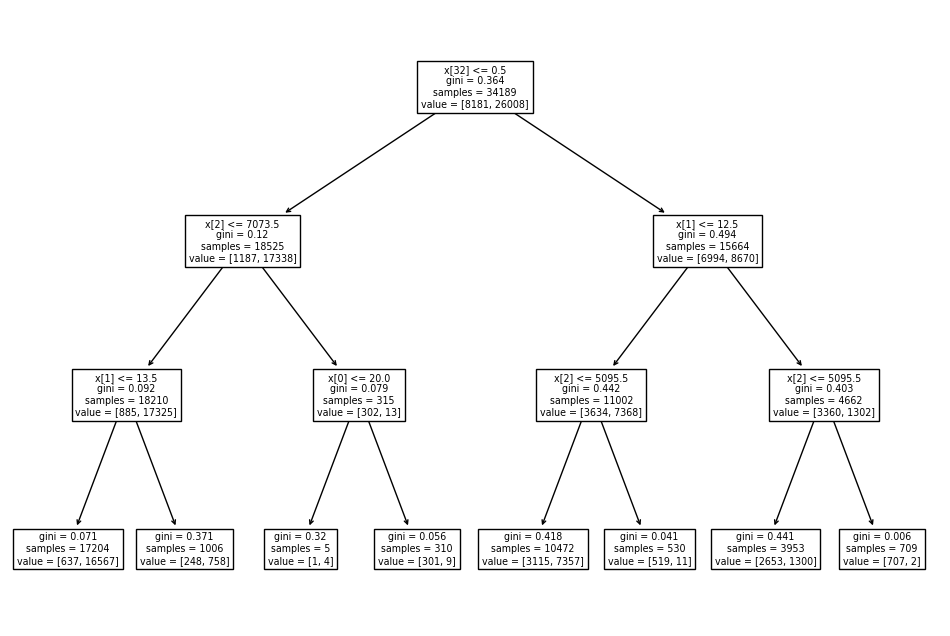

In [18]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize' : [12, 8], #그래프 크기
                     'figure.dpi' : '100'}) #해상도 설정

tree.plot_tree(model); #그래프 (;)를 입력해 메세지를 제외

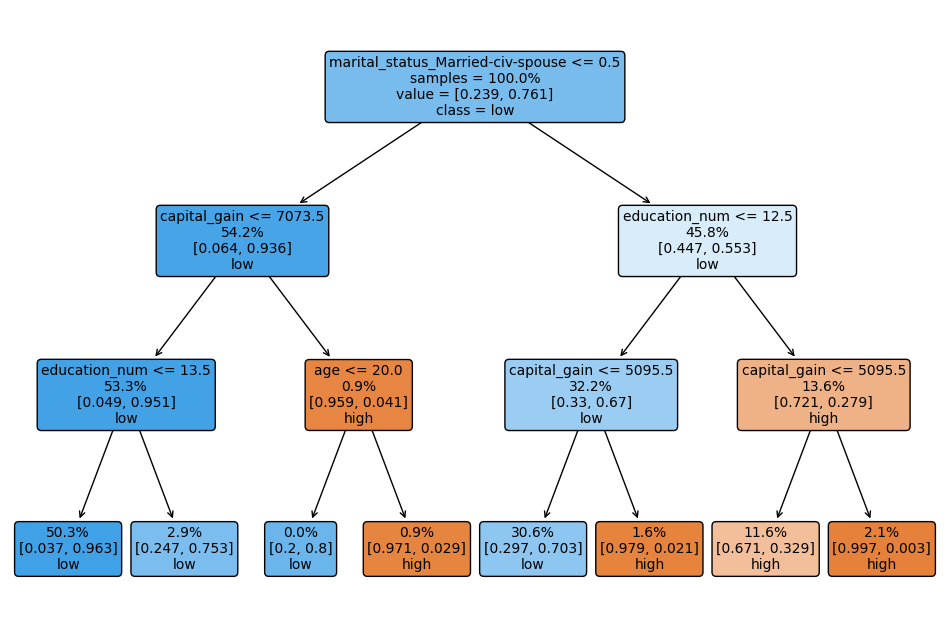

In [19]:
#tree.plot_tree에 파라미터를 추가해 그래프를 수정
tree.plot_tree(model,
               feature_names = train_x.columns, # 예측 변수명
               class_names = ["high", "low"], # 타겟 변수 클래스, 알파벳순
               proportion = True, # 비율 표기
               filled = True, #색칠
               rounded = True, #둥근테두리
               impurity = False, #불순도 표시
               label = 'root', # label 표기 위치
               fontsize = 10); # 글자 크기

[첫 번째 노드 해석]

맨위부터 아래 순으로 >>

분리 기준, 노드에 해당하는 관측치 비율, 타깃 변수의 클래스별 비율, 우세한 클래스(0.5기준)

타깃 변수의 클래스별 비율의 경우 high 다음 low의 순이기 때문에 high가 0.239%이다.

Yes -> 왼쪽의 노드로 가고, No -> 오른쪽 노드로 간다.

marital_status_Married-civ-spouse는 원핫 인코딩(0, 1)이므로 <=0.5 조건을 충족하는 0인경우. 즉 비혼인 경우 왼쪽 노드로 내려간다.

[두 번째 노드 해석]

<왼쪽>

첫 번째 줄 : 비혼자들로 구성. 다음으로 노드를 나누는 기준 'capital_gain'

두 번째 줄 : 전체 중 비혼자의 비율

세 번째 줄 : income의 low가 6.4%, high가 93.6%

네 번째 줄 : Low

<오른쪽>

첫 번째 줄 : 기혼자들로 구성. 다음으로 노드를 나누는 기준 'education_num'

두 번째 줄 : 전체 중 비혼자의 비율

세 번째 줄 : income의 low가 44.7%, high가 55.3%

네 번째 줄 : Low

노드의 색농도는 비율이 높을수록 농도가 진하다.

---

### 모델을 이용해 예측 model.predict()

In [20]:
test_x = df_test.drop(columns = 'income') # 예측 변수 추출
test_y = df_test['income'] # 타겟 변수 추출

In [21]:
# 예측값 구하기
df_test['pred'] = model.predict(test_x)
df_test # pred라는 변수에 모델 예측값 저장

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income,pred
11712,58,10,0,0,60,0,0,0,0,0,...,0,0,0,0,0,1,0,0,low,low
24768,39,10,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,low,low
26758,31,4,0,0,20,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
14295,23,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
3683,24,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,24,13,0,0,30,0,0,0,0,1,...,0,0,0,0,0,1,0,0,low,low
48445,35,13,10520,0,45,0,0,0,0,1,...,0,0,0,0,0,1,0,0,high,high
19639,41,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,high,low
21606,29,4,0,0,30,0,0,0,0,1,...,0,0,0,0,0,0,0,0,low,low


###성능 평가

confusion matrix 만들기(혼동 행렬)

sklearn.metrics의 confusion_matrix()를 이용해 만든다.

안에 들어가는 파라미터 : y_true(타겟 변수), y_pred(예측 변수), labels(클래스 배치 순서)

In [22]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true = df_test['income'], #실제값
                            y_pred = df_test['pred'], #예측값
                            labels = ['high', 'low']) #클래스 배치 순서
conf_mat

array([[ 1801,  1705],
       [  582, 10565]])

sklearn.metrics의 ConfusionMatrixDisplay()를 이용해 컨퓨전 매트릭스로 히트맵을 만들기

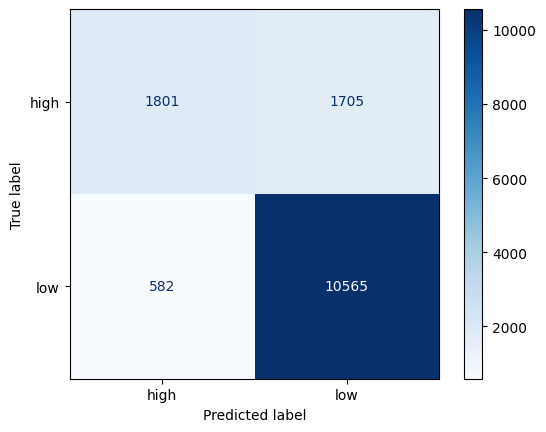

In [23]:
plt.rcParams.update(plt.rcParamsDefault)

from sklearn.metrics import ConfusionMatrixDisplay
p = ConfusionMatrixDisplay(confusion_matrix = conf_mat, # 컨퓨전 매트릭스 적용
                           display_labels = ('high', 'low')) # 타겟 변수 클래스명

p.plot(cmap = 'Blues') # 컬러맵 적용
plt.show()

confusion matrix의 행은 실제 빈도를 의미한다.

첫 번째 행은 income이 실제로 high인 사람. 두 번째 행은 실제로 low인 사람을 의미

- 첫 번째 열의 값

모델이 2383명을 high로 예측했다.

이 중 실제로 high : 1801 (정답), low : 582 (오답)

- 두 번째 열의 값

모델이 12270명을 low로 예측했다.

이 중 실제로 high : 1705 (오답), low : 10565 (정답)



<컨퓨전 매트릭스 셀>

TP, FN

FP, TN 으로 구성되어 있다. (income이 'high'라면 Positive, 'low'면 Negative <- 내가 설정한 클래스 기준)


#### 성능 평가 지표 구하기

#### 정확도 Accuracy

conf_mat

Accuracy = (TP + TN) / (TP + TN + FP + FN)

정확도 = 실제 / 모든 셀

또는 sklearn.metrics의 accuracy_score()을 이용해 구할 수 있다.

In [24]:
import sklearn.metrics as metrics
metrics.accuracy_score(y_true = df_test['income'], # 실제값
                       y_pred = df_test['pred']) # 예측값

0.8439227461953184

#### 정밀도 Precision

관심 클래스를 예측해서 맞춘 비율을 의미

Precision = TP / (TP + FP)

또는 metrics.precision_score()을 이용해 구할 수 있다.

In [25]:
metrics.precision_score(y_true = df_test['income'],
                       y_pred = df_test['pred'],
                        pos_label = 'high') # 관심 클래스

0.7557700377675199

####재현율 Recall

실제 데이터에서 관심 클래스를 찾아낸 비율을 의미

Recall = TP / (TP + FN)

또는 metrics.recall_score()을 이용해 구할 수 있다.

In [26]:
metrics.recall_score(y_true = df_test['income'],
                       y_pred = df_test['pred'],
                        pos_label = 'high')

0.5136908157444381

#### F1 score

recall 과 precision의 조화평균으로 성능이 높을수록 1에 가까운 값이 된다.

metrics.f1_score()

In [27]:
metrics.f1_score(y_true = df_test['income'],
                       y_pred = df_test['pred'],
                        pos_label = 'high')

0.6116488368143997

[정리]

precision : 관심 클래스가 분명할 때

recall : 관심 클래스를 최대한 많이 찾아내야 할 때

F1 score : recall과 precision이 모두 중요할 때